## Importando bibliotecas e dados

In [ ]:
#imports
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc
from sklearn import metrics
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, validation_curve
from sklearn.datasets import make_classification
from sklearn.pipeline import make_pipeline

In [ ]:
#carregando os dadasets

df_train = pd.read_csv('unimelb_training.csv')
df_test = pd.read_csv('unimelb_test.csv')
df_example = pd.read_csv('unimelb_example.csv')

df_train.head()

<ipython-input-2-9ed92657e4e8>:3: DtypeWarning: Columns (90,105,119,120,123,124,132,134,135,138,139,147,149,150,153,154,162,164,165,168,169,177,179,183,184,192,194,198,199,207,209,213,214,224,237,239,244) have mixed types. Specify dtype option on import or set low_memory=False.
  df_train = pd.read_csv('unimelb_training.csv')


,Grant.Application.ID,Grant.Status,Sponsor.Code,Grant.Category.Code,Contract.Value.Band...see.note.A,Start.date,RFCD.Code.1,RFCD.Percentage.1,RFCD.Code.2,RFCD.Percentage.2,...,Faculty.No..15,With.PHD.15,No..of.Years.in.Uni.at.Time.of.Grant.15,Number.of.Successful.Grant.15,Number.of.Unsuccessful.Grant.15,A..15,A.15,B.15,C.15,Unnamed: 251
0,1,1,NaN,NaN,A,8/11/05,280199.0,100.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1,2B,10A,B,11/11/05,280103.0,30.0,280106.0,30.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,1,29A,10B,A,14/11/05,321004.0,60.0,321216.0,40.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,1,40D,10B,C,15/11/05,270602.0,50.0,320602.0,50.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,0,59C,10A,A,16/11/05,260500.0,34.0,280000.0,33.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Filtrando Preditores


Verificando a existência de dados faltantes no dataset (TEM MUITOS)


In [ ]:
df_train.isna().sum()

Grant.Application.ID                   0
Grant.Status                           0
Sponsor.Code                         912
Grant.Category.Code                  912
Contract.Value.Band...see.note.A    3563
                                    ... 
A..15                               8706
A.15                                8706
B.15                                8706
C.15                                8708
Unnamed: 251                        8708
Length: 252, dtype: int64

In [ ]:
# removendo preditores com mais de 40% de dados faltantes e salvando as colunas deletadas para aplicar ao conjunto de teste

df_train_drop1 = df_train.dropna(thresh=5248, axis=1) #60% de 8708 (mantendo os que tem ao menos 60% das amostras não NAN)

# Armazena as colunas dropadas
colunas_originais = df_train.columns.tolist()
colunas_dropadas = list(set(colunas_originais) - set(df_train_drop1.columns)) #essas colunas dropadas serão úteis para adaptar o conjunto de teste

df_train_drop1.head() #restam agora apenas 38 preditores dos 252 originais


,Grant.Application.ID,Grant.Status,Sponsor.Code,Grant.Category.Code,Start.date,RFCD.Code.1,RFCD.Percentage.1,RFCD.Code.2,RFCD.Percentage.2,RFCD.Code.3,...,Country.of.Birth.1,Dept.No..1,Faculty.No..1,No..of.Years.in.Uni.at.Time.of.Grant.1,Number.of.Successful.Grant.1,Number.of.Unsuccessful.Grant.1,A..1,A.1,B.1,C.1
0,1,1,NaN,NaN,8/11/05,280199.0,100.0,0.0,0.0,0.0,...,Asia Pacific,3073.0,31.0,Less than 0,0.0,0.0,4.0,2.0,0.0,0.0
1,2,1,2B,10A,11/11/05,280103.0,30.0,280106.0,30.0,280203.0,...,Australia,2538.0,25.0,more than 15,0.0,0.0,6.0,12.0,2.0,2.0
2,3,1,29A,10B,14/11/05,321004.0,60.0,321216.0,40.0,0.0,...,Australia,2923.0,25.0,>5 to 10,0.0,0.0,0.0,3.0,5.0,2.0
3,4,1,40D,10B,15/11/05,270602.0,50.0,320602.0,50.0,0.0,...,Australia,2678.0,25.0,>5 to 10,0.0,0.0,0.0,3.0,13.0,3.0
4,5,0,59C,10A,16/11/05,260500.0,34.0,280000.0,33.0,290000.0,...,Western Europe,2153.0,19.0,>5 to 10,0.0,0.0,3.0,0.0,1.0,0.0


In [ ]:
#verificando a quantidade de dados faltantes nos preditores restantes
#podemos ver que é uma quantidade considerável, mas é melhor doq 4000 mil faltantes

df_train_drop1.isna().sum()

Grant.Application.ID                         0
Grant.Status                                 0
Sponsor.Code                               912
Grant.Category.Code                        912
Start.date                                   0
RFCD.Code.1                                634
RFCD.Percentage.1                          634
RFCD.Code.2                                634
RFCD.Percentage.2                          634
RFCD.Code.3                                634
RFCD.Percentage.3                          634
RFCD.Code.4                                634
RFCD.Percentage.4                          634
RFCD.Code.5                                634
RFCD.Percentage.5                          634
SEO.Code.1                                 664
SEO.Percentage.1                           664
SEO.Code.2                                 664
SEO.Percentage.2                           664
SEO.Code.3                                 664
SEO.Percentage.3                           664
SEO.Code.4   

In [ ]:
df_train_drop1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8708 entries, 0 to 8707
Data columns (total 38 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Grant.Application.ID                    8708 non-null   int64  
 1   Grant.Status                            8708 non-null   int64  
 2   Sponsor.Code                            7796 non-null   object 
 3   Grant.Category.Code                     7796 non-null   object 
 4   Start.date                              8708 non-null   object 
 5   RFCD.Code.1                             8074 non-null   float64
 6   RFCD.Percentage.1                       8074 non-null   float64
 7   RFCD.Code.2                             8074 non-null   float64
 8   RFCD.Percentage.2                       8074 non-null   float64
 9   RFCD.Code.3                             8074 non-null   float64
 10  RFCD.Percentage.3                       8074 non-null   floa

# Filtrando Amostras


In [ ]:
#agora vamos dropar as amostras com dados faltantes

#coloquei uma tolerância de até 3 dados faltantes por amostra. Amostras com 4 ou mais dados serão removidas
df_train_drop2 = df_train_drop1.dropna(thresh=35) #ao menos 35 das 38

df_train_drop2.info() #com essa remoção, ficamos com 7290 amostras das 8708 originais

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7290 entries, 0 to 8707
Data columns (total 38 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Grant.Application.ID                    7290 non-null   int64  
 1   Grant.Status                            7290 non-null   int64  
 2   Sponsor.Code                            6686 non-null   object 
 3   Grant.Category.Code                     6686 non-null   object 
 4   Start.date                              7290 non-null   object 
 5   RFCD.Code.1                             7290 non-null   float64
 6   RFCD.Percentage.1                       7290 non-null   float64
 7   RFCD.Code.2                             7290 non-null   float64
 8   RFCD.Percentage.2                       7290 non-null   float64
 9   RFCD.Code.3                             7290 non-null   float64
 10  RFCD.Percentage.3                       7290 non-null   floa

# Tratando dados faltantes nas amostras

In [ ]:
# verificando o número absoluto de valores ausentes
df_train_drop2.isna().sum()

Grant.Application.ID                        0
Grant.Status                                0
Sponsor.Code                              604
Grant.Category.Code                       604
Start.date                                  0
RFCD.Code.1                                 0
RFCD.Percentage.1                           0
RFCD.Code.2                                 0
RFCD.Percentage.2                           0
RFCD.Code.3                                 0
RFCD.Percentage.3                           0
RFCD.Code.4                                 0
RFCD.Percentage.4                           0
RFCD.Code.5                                 0
RFCD.Percentage.5                           0
SEO.Code.1                                  0
SEO.Percentage.1                            0
SEO.Code.2                                  0
SEO.Percentage.2                            0
SEO.Code.3                                  0
SEO.Percentage.3                            0
SEO.Code.4                        

In [ ]:
#verificando o percentual de valores ausentes
faltantes_percentual = (df_train_drop2.isnull().sum()/len(df_train_drop2['Grant.Application.ID']))*100

print(faltantes_percentual)

Grant.Application.ID                      0.000000
Grant.Status                              0.000000
Sponsor.Code                              8.285322
Grant.Category.Code                       8.285322
Start.date                                0.000000
RFCD.Code.1                               0.000000
RFCD.Percentage.1                         0.000000
RFCD.Code.2                               0.000000
RFCD.Percentage.2                         0.000000
RFCD.Code.3                               0.000000
RFCD.Percentage.3                         0.000000
RFCD.Code.4                               0.000000
RFCD.Percentage.4                         0.000000
RFCD.Code.5                               0.000000
RFCD.Percentage.5                         0.000000
SEO.Code.1                                0.000000
SEO.Percentage.1                          0.000000
SEO.Code.2                                0.000000
SEO.Percentage.2                          0.000000
SEO.Code.3                     

In [ ]:
#agora vamos pegar as colunas com dados faltantes para fazer o tratamento adequado
colunas_com_valores_faltantes = []

for coluna in df_train_drop2.columns:
  if df_train_drop2[coluna].isna().sum() > 0:
    colunas_com_valores_faltantes.append(coluna)

print(colunas_com_valores_faltantes)
#['Sponsor.Code', 'Grant.Category.Code', 'Year.of.Birth.1', 'Country.of.Birth.1', 'Dept.No..1', 'Faculty.No..1', 'No..of.Years.in.Uni.at.Time.of.Grant.1']

['Sponsor.Code', 'Grant.Category.Code', 'Year.of.Birth.1', 'Country.of.Birth.1', 'Dept.No..1', 'Faculty.No..1', 'No..of.Years.in.Uni.at.Time.of.Grant.1']


In [ ]:
df_train_drop2[colunas_com_valores_faltantes].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7290 entries, 0 to 8707
Data columns (total 7 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Sponsor.Code                            6686 non-null   object 
 1   Grant.Category.Code                     6686 non-null   object 
 2   Year.of.Birth.1                         7287 non-null   float64
 3   Country.of.Birth.1                      6871 non-null   object 
 4   Dept.No..1                              7247 non-null   float64
 5   Faculty.No..1                           7244 non-null   float64
 6   No..of.Years.in.Uni.at.Time.of.Grant.1  6702 non-null   object 
dtypes: float64(3), object(4)
memory usage: 455.6+ KB


Separando os dados quantitativos dos qualitativos

In [ ]:
#Separação dados FLOAT
dados_faltantes_float = df_train_drop2[['Year.of.Birth.1', 'Dept.No..1', 'Faculty.No..1']]

dados_faltantes_float.head()

,Year.of.Birth.1,Dept.No..1,Faculty.No..1
0,1965.0,3073.0,31.0
1,1960.0,2538.0,25.0
2,1955.0,2923.0,25.0
3,1955.0,2678.0,25.0
4,1965.0,2153.0,19.0


In [ ]:
#Separação dados qualitativos
dados_faltantes_categoricos = df_train_drop2[['Sponsor.Code', 'Grant.Category.Code', 'Country.of.Birth.1', 'No..of.Years.in.Uni.at.Time.of.Grant.1']]

dados_faltantes_categoricos.head()

,Sponsor.Code,Grant.Category.Code,Country.of.Birth.1,No..of.Years.in.Uni.at.Time.of.Grant.1
0,NaN,NaN,Asia Pacific,Less than 0
1,2B,10A,Australia,more than 15
2,29A,10B,Australia,>5 to 10
3,40D,10B,Australia,>5 to 10
4,59C,10A,Western Europe,>5 to 10


AGOOOORA, vamos finalmente colocar os valores

OBS: ainda estou conversando com a monitora sobre qual método é o melhor, apliquei a substituição por média e moda, mas quero ver se o KNN faria a boa

Ela falou que utilizar esse método deu quase o mesmo resultado, mas foi muito mais custoso computacionalmente

Vamos ficar com esse mesmo

aplicando moda nos categóricos

In [ ]:
#Para os dados categóricos, iremos aplicar a moda para preenhcer os dados faltantes
df_train_drop2.loc[:, dados_faltantes_categoricos.columns] = df_train_drop2[dados_faltantes_categoricos.columns].apply(lambda col: col.fillna(col.mode().loc[0]))

<ipython-input-14-7319a1003492>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_drop2.loc[:, dados_faltantes_categoricos.columns] = df_train_drop2[dados_faltantes_categoricos.columns].apply(lambda col: col.fillna(col.mode().loc[0]))


In [ ]:
#deu certo :D
df_train_drop2[dados_faltantes_categoricos.columns].isna().sum()

Sponsor.Code                              0
Grant.Category.Code                       0
Country.of.Birth.1                        0
No..of.Years.in.Uni.at.Time.of.Grant.1    0
dtype: int64

In [ ]:
#perfeito, agora só falta os float
df_train_drop2.isna().sum()

Grant.Application.ID                       0
Grant.Status                               0
Sponsor.Code                               0
Grant.Category.Code                        0
Start.date                                 0
RFCD.Code.1                                0
RFCD.Percentage.1                          0
RFCD.Code.2                                0
RFCD.Percentage.2                          0
RFCD.Code.3                                0
RFCD.Percentage.3                          0
RFCD.Code.4                                0
RFCD.Percentage.4                          0
RFCD.Code.5                                0
RFCD.Percentage.5                          0
SEO.Code.1                                 0
SEO.Percentage.1                           0
SEO.Code.2                                 0
SEO.Percentage.2                           0
SEO.Code.3                                 0
SEO.Percentage.3                           0
SEO.Code.4                                 0
SEO.Percen

Vamos tratar os float agora

In [ ]:
#dessa vez, vamos preencher os dados faltantes com a média de cada coluna
for col in dados_faltantes_float.columns:
    df_train_drop2[col].fillna(df_train_drop2[col].mean(), inplace=True)

<ipython-input-17-1ae6b4499ebc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_drop2[col].fillna(df_train_drop2[col].mean(), inplace=True)


In [ ]:
#TÁ ZERADOOOO, N TEM MAIS NADA FALTANDO YEEEEE
sum(df_train_drop2.isna().sum())

0

# Utilizando o encoder nas qualitativas

In [ ]:
#um probleminha que temos é que algumas classes são do tipo object, ou seja, categóricas
#vamos transforma-las em quantitativas :)

categorical_data = df_train_drop2.select_dtypes(include=['object']).columns.tolist()

categorical_data

['Sponsor.Code',
 'Grant.Category.Code',
 'Start.date',
 'Role.1',
 'Country.of.Birth.1',
 'No..of.Years.in.Uni.at.Time.of.Grant.1']

In [ ]:
#Para isso, vamos usar o encoder, que associará um valor inteiro para cada uma das classes
label_encoder = LabelEncoder()

for col in df_train_drop2.columns:
    if df_train_drop2[col].dtype == 'object':
        df_train_drop2.loc[:, col] = label_encoder.fit_transform(df_train_drop2.loc[:, col])

#antes um warning doq um erro :P

<ipython-input-20-a26a19eebec6>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_drop2.loc[:, col] = label_encoder.fit_transform(df_train_drop2.loc[:, col])
<ipython-input-20-a26a19eebec6>:6: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_train_drop2.loc[:, col] = label_encoder.fit_transform(df_train_drop2.loc[:, col])
<ipython-input-20-a26a19eebec6>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cavea

In [ ]:
#podemos ver que, por exemplo, os países agora são números
df_train_drop2.head()

,Grant.Application.ID,Grant.Status,Sponsor.Code,Grant.Category.Code,Start.date,RFCD.Code.1,RFCD.Percentage.1,RFCD.Code.2,RFCD.Percentage.2,RFCD.Code.3,...,Country.of.Birth.1,Dept.No..1,Faculty.No..1,No..of.Years.in.Uni.at.Time.of.Grant.1,Number.of.Successful.Grant.1,Number.of.Unsuccessful.Grant.1,A..1,A.1,B.1,C.1
0,1,1,233,0,656,280199.0,100.0,0.0,0.0,0.0,...,0,3073.0,31.0,3,0.0,0.0,4.0,2.0,0.0,0.0
1,2,1,172,0,76,280103.0,30.0,280106.0,30.0,280203.0,...,1,2538.0,25.0,4,0.0,0.0,6.0,12.0,2.0,2.0
2,3,1,171,1,139,321004.0,60.0,321216.0,40.0,0.0,...,1,2923.0,25.0,1,0.0,0.0,0.0,3.0,5.0,2.0
3,4,1,215,1,167,270602.0,50.0,320602.0,50.0,0.0,...,1,2678.0,25.0,1,0.0,0.0,0.0,3.0,13.0,3.0
4,5,0,241,0,190,260500.0,34.0,280000.0,33.0,290000.0,...,9,2153.0,19.0,1,0.0,0.0,3.0,0.0,1.0,0.0


vamos separar o grant status do resto do data set, já que ele é o nosso y

In [ ]:
#vai servir pra fazer o modelo
y_train = df_train_drop2['Grant.Status']
x_train = df_train_drop2.drop(['Grant.Status'], axis = 1)


OKOKOKOK, agora vamos ter que adaptar os dados de teste para que eles fiquem no mesmo molde dos de treino

# Ajustando os dados de teste (foi em vão)

Dropar colunas tal qual feito no treino

In [ ]:
#o parâmetro colunas dropadas foi obtido no tratamento do conjunto de teste
teste_clean = df_test.drop(colunas_dropadas, axis = 1);
teste_clean.head()

,Grant.Application.ID,Grant.Status,Sponsor.Code,Grant.Category.Code,Start.date,RFCD.Code.1,RFCD.Percentage.1,RFCD.Code.2,RFCD.Percentage.2,RFCD.Code.3,...,Country.of.Birth.1,Dept.No..1,Faculty.No..1,No..of.Years.in.Uni.at.Time.of.Grant.1,Number.of.Successful.Grant.1,Number.of.Unsuccessful.Grant.1,A..1,A.1,B.1,C.1
0,1,NaN,47C,10B,1/01/09,NaN,NaN,NaN,NaN,NaN,...,Australia,2603.0,25.0,>5 to 10,4.0,2.0,8.0,4.0,10.0,0.0
1,2,NaN,32D,30B,1/01/09,270199.0,100.0,0.0,0.0,0.0,...,Australia,2828.0,25.0,>5 to 10,5.0,3.0,4.0,5.0,5.0,0.0
2,3,NaN,99C,30B,1/01/09,NaN,NaN,NaN,NaN,NaN,...,Australia,2853.0,25.0,>10 to 15,0.0,2.0,9.0,34.0,22.0,20.0
3,4,NaN,2B,10A,1/01/09,280204.0,60.0,280506.0,20.0,230119.0,...,Great Britain,2153.0,19.0,>5 to 10,4.0,0.0,5.0,3.0,6.0,2.0
4,5,NaN,24D,30B,1/01/09,320502.0,50.0,320703.0,50.0,0.0,...,Australia,2668.0,25.0,>=0 to 5,2.0,7.0,11.0,3.0,2.0,0.0


Dropando as linhas, seguindo o mesmo threshold, atribuindo os valores da df_example na grant status do conjunto de teste


In [ ]:
#fazendo o filtro e atribuindo os valores
df_example = pd.read_csv('unimelb_example.csv')

teste_clean2 = teste_clean.dropna(thresh=35)
teste_clean2['Grant.Status'] = df_example['Grant.Status']
teste_clean2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1523 entries, 1 to 2125
Data columns (total 38 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Grant.Application.ID                    1523 non-null   int64  
 1   Grant.Status                            1523 non-null   float64
 2   Sponsor.Code                            1503 non-null   object 
 3   Grant.Category.Code                     1503 non-null   object 
 4   Start.date                              1523 non-null   object 
 5   RFCD.Code.1                             1523 non-null   float64
 6   RFCD.Percentage.1                       1523 non-null   float64
 7   RFCD.Code.2                             1523 non-null   float64
 8   RFCD.Percentage.2                       1523 non-null   float64
 9   RFCD.Code.3                             1523 non-null   float64
 10  RFCD.Percentage.3                       1523 non-null   floa

<ipython-input-24-8647503ac2b0>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  teste_clean2['Grant.Status'] = df_example['Grant.Status']


In [ ]:
#percentual de dados faltantes no conjunto de teste
faltantes_percentual_teste = (teste_clean2.isnull().sum()/len(teste_clean2['Grant.Application.ID']))*100

print(faltantes_percentual_teste)

Grant.Application.ID                      0.000000
Grant.Status                              0.000000
Sponsor.Code                              1.313198
Grant.Category.Code                       1.313198
Start.date                                0.000000
RFCD.Code.1                               0.000000
RFCD.Percentage.1                         0.000000
RFCD.Code.2                               0.000000
RFCD.Percentage.2                         0.000000
RFCD.Code.3                               0.000000
RFCD.Percentage.3                         0.000000
RFCD.Code.4                               0.000000
RFCD.Percentage.4                         0.000000
RFCD.Code.5                               0.000000
RFCD.Percentage.5                         0.000000
SEO.Code.1                                0.000000
SEO.Percentage.1                          0.000000
SEO.Code.2                                0.000000
SEO.Percentage.2                          0.000000
SEO.Code.3                     

In [ ]:
teste_com_valores_faltantes = []

for coluna in teste_clean2.columns:
  if teste_clean2[coluna].isna().sum() > 0:
    teste_com_valores_faltantes.append(coluna)

#a grant status tem q ser tratada com os valores da example.
#vamos dropar ela e colocar o y de teste a parte
print(colunas_com_valores_faltantes)
print(teste_com_valores_faltantes)



['Sponsor.Code', 'Grant.Category.Code', 'Year.of.Birth.1', 'Country.of.Birth.1', 'Dept.No..1', 'Faculty.No..1', 'No..of.Years.in.Uni.at.Time.of.Grant.1']
['Sponsor.Code', 'Grant.Category.Code', 'Year.of.Birth.1', 'Country.of.Birth.1', 'Dept.No..1', 'Faculty.No..1', 'No..of.Years.in.Uni.at.Time.of.Grant.1']


In [ ]:
teste_clean2[teste_com_valores_faltantes].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1523 entries, 1 to 2125
Data columns (total 7 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Sponsor.Code                            1503 non-null   object 
 1   Grant.Category.Code                     1503 non-null   object 
 2   Year.of.Birth.1                         1522 non-null   float64
 3   Country.of.Birth.1                      1392 non-null   object 
 4   Dept.No..1                              1522 non-null   float64
 5   Faculty.No..1                           1522 non-null   float64
 6   No..of.Years.in.Uni.at.Time.of.Grant.1  1454 non-null   object 
dtypes: float64(3), object(4)
memory usage: 95.2+ KB


Aplicando o mesmo preenchimento de moda em categóricos e média em contínuos

In [ ]:
#Separação dados FLOAT
teste_faltantes_float = teste_clean2[['Year.of.Birth.1', 'Dept.No..1', 'Faculty.No..1']]

teste_faltantes_float.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1523 entries, 1 to 2125
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year.of.Birth.1  1522 non-null   float64
 1   Dept.No..1       1522 non-null   float64
 2   Faculty.No..1    1522 non-null   float64
dtypes: float64(3)
memory usage: 47.6 KB


In [ ]:
#Separação dados categóricos
teste_faltantes_categoricos = df_train_drop2[['Sponsor.Code', 'Grant.Category.Code', 'Country.of.Birth.1', 'No..of.Years.in.Uni.at.Time.of.Grant.1']]

teste_faltantes_categoricos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7290 entries, 0 to 8707
Data columns (total 4 columns):
 #   Column                                  Non-Null Count  Dtype
---  ------                                  --------------  -----
 0   Sponsor.Code                            7290 non-null   int64
 1   Grant.Category.Code                     7290 non-null   int64
 2   Country.of.Birth.1                      7290 non-null   int64
 3   No..of.Years.in.Uni.at.Time.of.Grant.1  7290 non-null   int64
dtypes: int64(4)
memory usage: 284.8 KB


In [ ]:
#Para os dados categóricos, iremos aplicar a moda para preencher os dados faltantes
teste_clean2.loc[:, teste_faltantes_categoricos.columns] = teste_clean2[teste_faltantes_categoricos.columns].apply(lambda col: col.fillna(col.mode().loc[0]))

<ipython-input-30-b0796a46a3da>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  teste_clean2.loc[:, teste_faltantes_categoricos.columns] = teste_clean2[teste_faltantes_categoricos.columns].apply(lambda col: col.fillna(col.mode().loc[0]))


In [ ]:
#deu bom
teste_clean2[teste_faltantes_categoricos.columns].isna().sum()

Sponsor.Code                              0
Grant.Category.Code                       0
Country.of.Birth.1                        0
No..of.Years.in.Uni.at.Time.of.Grant.1    0
dtype: int64

In [ ]:
#dessa vez, vamos preencher os dados faltantes com a média de cada coluna
for col in teste_faltantes_float.columns:
    teste_clean2[col].fillna(teste_clean2[col].mean(), inplace=True)

<ipython-input-32-3bc37792afc7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  teste_clean2[col].fillna(teste_clean2[col].mean(), inplace=True)


In [ ]:
#deu bom
teste_clean2[teste_faltantes_float.columns].isna().sum()

Year.of.Birth.1    0
Dept.No..1         0
Faculty.No..1      0
dtype: int64

In [ ]:
#aplicando encoder
#Para isso, vamos usar o encoder, que associará um valor inteiro para cada uma das classes
label_encoder = LabelEncoder()

for col in teste_clean2.columns:
    if teste_clean2[col].dtype == 'object':
        teste_clean2.loc[:, col] = label_encoder.fit_transform(teste_clean2.loc[:, col])

<ipython-input-34-c8c2f562102a>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  teste_clean2.loc[:, col] = label_encoder.fit_transform(teste_clean2.loc[:, col])
<ipython-input-34-c8c2f562102a>:7: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  teste_clean2.loc[:, col] = label_encoder.fit_transform(teste_clean2.loc[:, col])
<ipython-input-34-c8c2f562102a>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

In [ ]:
#vai servir pra fazer o modelo
#por algum motivo, os dados do conjunto teste_clean2 são alterados, então rode novamente a parte de ajuste dos dados para resetar
#mas tá certo

y_test = teste_clean2['Grant.Status']
x_test = teste_clean2.drop(['Grant.Status'], axis = 1)

#função para arrendondar os valores de probabilidade
def arredondar_valor(valor):
    if valor < 0.5:
        return 0
    else:
        return 1

# Aplicar a função aos elementos da coluna

for i in range(len(y_test)):
    y_test.iloc[i] = arredondar_valor(y_test.iloc[i])



<ipython-input-35-284940808ab9>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_test.iloc[i] = arredondar_valor(y_test.iloc[i])


In [ ]:
y_test.info()

<class 'pandas.core.series.Series'>
Int64Index: 1523 entries, 1 to 2125
Series name: Grant.Status
Non-Null Count  Dtype  
--------------  -----  
1523 non-null   float64
dtypes: float64(1)
memory usage: 23.8 KB


# Subdividindo o conjunto de treino original em treino e teste (teve mais precisão)


In [ ]:
#realizando a subdivisão
X_train, X_test, Y_train, Y_test = train_test_split(x_train, y_train, test_size=0.25, random_state=16)
Y_test.info()

<class 'pandas.core.series.Series'>
Int64Index: 1823 entries, 2901 to 1370
Series name: Grant.Status
Non-Null Count  Dtype
--------------  -----
1823 non-null   int64
dtypes: int64(1)
memory usage: 28.5 KB


Infelizmente, o tratamento que fiz para os dados do de teste não foram bons, deixaram todos os modelos aproximadamente a mesma acurácia. Acredito que essa observação se deve ao fato de que atribuí o arredondamento dos valores probabilisticos do de teste como uma verdade, oq é errôneo considerando que não sabíamos a acurácia do modelo utilizado para obter tais métricas.

Por isso, acabei subdividindo o conjunto de treino original em um novo conjunto de treino menor e um de teste novo tbm

# Função de métricas de perfomance

In [ ]:
#definindo funções de métricas
def performance(matrix):
  vp = matrix[0][0]
  fn = matrix[0][1]
  fp = matrix[1][0]
  vn = matrix[1][1]
  resultados = [0.0] * 6

  #precisão
  resultados[0] = vp/(vp + fp)
  #sensibilidade
  resultados[1] = vp/(vp + fn)
  #acurácia
  resultados[2] = (vp + vn)/(vp + vn + fp + fn)
  #especificidade
  resultados[3] = vn/(vn + fp)
  #taxa de predito negativo
  resultados[4] = vn/(vn + fn)
  #taxa de falso positivo
  resultados[5] = fp/(vp + fp)

  print('\nRESULTADOS DO MODELO :\n')
  print('precisão = ' + str(resultados[0]))
  print('sensibilidade = ' + str(resultados[1]))
  print('acurácia = ' + str(resultados[2]))
  print('especificidade = ' + str(resultados[3]))
  print('taxa de predito negativo = ' + str(resultados[4]))
  print('taxa de falso positivo = ' + str(resultados[5]) + '\n')

  return resultados

# MODELO LINEAR: Regressão Logística

Acurácia do modelo: 0.5831047723532639
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.58      0.73      0.65       947
           1       0.59      0.42      0.49       876

    accuracy                           0.58      1823
   macro avg       0.59      0.58      0.57      1823
weighted avg       0.59      0.58      0.57      1823

Matriz de Confusão:
[[692 255]
 [505 371]]

RESULTADOS DO MODELO :

precisão = 0.5781119465329991
sensibilidade = 0.7307286166842661
acurácia = 0.5831047723532639
especificidade = 0.4235159817351598
taxa de predito negativo = 0.5926517571884984
taxa de falso positivo = 0.4218880534670008



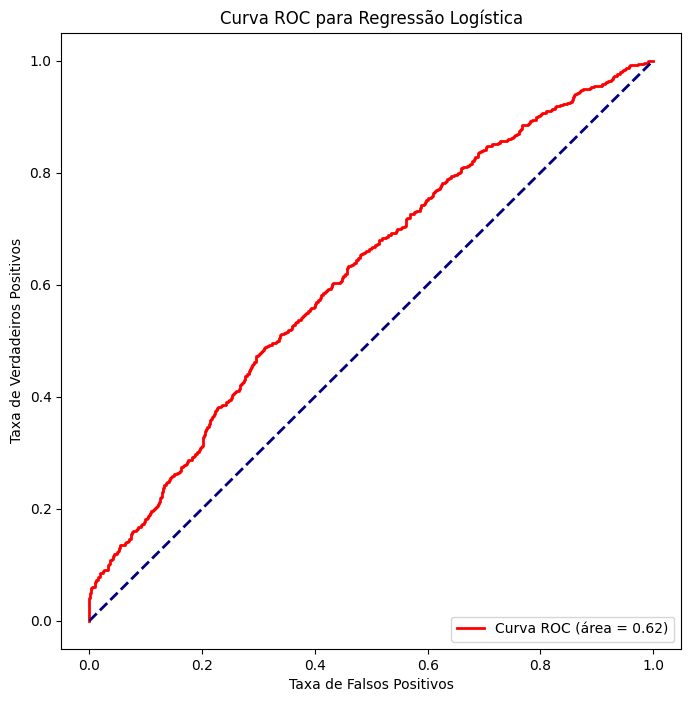

In [ ]:
# Criar uma instância do modelo de regressão logística
modelo_reglog = LogisticRegression(max_iter=1500)

# Treinar o modelo com os conjuntos de treinamento
modelo_reglog.fit(X_train, Y_train)

# Fazer previsões nos conjuntos de teste
Y_pred = modelo_reglog.predict(X_test)

# Avaliar a precisão do modelo
acuracia = accuracy_score(Y_test, Y_pred)
print(f'Acurácia do modelo: {acuracia}')

# Exibir relatório de classificação
relatorio_classificacao = classification_report(Y_test, Y_pred)
print('Relatório de Classificação:')
print(relatorio_classificacao)

# Calcular a matriz de confusão
cnf_matrix = metrics.confusion_matrix(Y_test, Y_pred)
print('Matriz de Confusão:')

#para personalizar valores:
#cnf_matrix[0][0] = 104 #vp sup esq
#cnf_matrix[0][1] = 781 #fn sup direito
#cnf_matrix[1][0] = 38 #fp inf esq
#cnf_matrix[1][1] = 703 #vn inf dir

print(cnf_matrix)

#a matriz é:
#692 255
#505 371

#usando a minha função de performance
prec_rl = performance(cnf_matrix)

# Calculando a curva ROC
y_score_reglog = modelo_reglog.decision_function(X_test)
fpr_reglog, tpr_reglog, thresholds_reglog = roc_curve(Y_test, y_score_reglog)
roc_auc_reglog = auc(fpr_reglog, tpr_reglog)

# Plotando a curva ROC
plt.figure(figsize=(8, 8))
plt.plot(fpr_reglog, tpr_reglog, color='red', lw=2, label='Curva ROC (área = {:.2f})'.format(roc_auc_reglog))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC para Regressão Logística')
plt.legend(loc='lower right')
plt.show()

# MODELO LINEAR: LDA

Acurácia do modelo LDA: 0.7312122874382886
Relatório de Classificação LDA:
              precision    recall  f1-score   support

           0       0.72      0.79      0.75       947
           1       0.74      0.67      0.71       876

    accuracy                           0.73      1823
   macro avg       0.73      0.73      0.73      1823
weighted avg       0.73      0.73      0.73      1823

[[746 201]
 [289 587]]

RESULTADOS DO MODELO :

precisão = 0.7207729468599033
sensibilidade = 0.7877507919746568
acurácia = 0.7312122874382886
especificidade = 0.6700913242009132
taxa de predito negativo = 0.7449238578680203
taxa de falso positivo = 0.2792270531400966



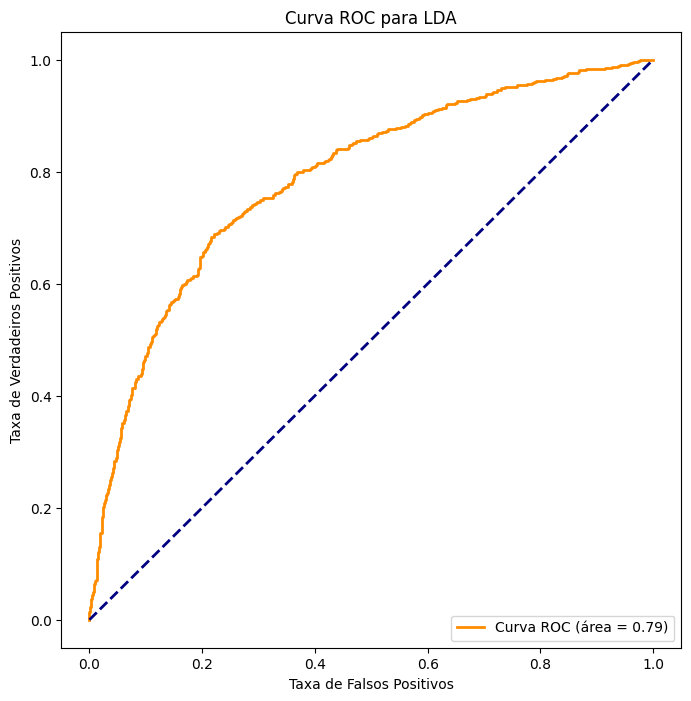

In [ ]:
# LDA
lda = LinearDiscriminantAnalysis()

# Treinando o modelo com os conjuntos de treinamento
lda.fit(X_train, Y_train)

# Fazendo as previsões nos conjuntos de teste
Y_pred_lda = lda.predict(X_test)

# Avaliando a precisão do modelo LDA
acuracia_lda = accuracy_score(Y_test, Y_pred_lda)
print(f'Acurácia do modelo LDA: {acuracia_lda}')

# Exibindo relatório de classificação
relatorio_classificacao_lda = classification_report(Y_test, Y_pred_lda)
print('Relatório de Classificação LDA:')
print(relatorio_classificacao_lda)

# Matriz de Confusão
cnf_matrix_lda = metrics.confusion_matrix(Y_test, Y_pred_lda)
print(cnf_matrix_lda)

#a matriz é:
#746 201
#289 587

#usando a minha função de performance
perfm_lda = performance(cnf_matrix_lda)

# Calculando a curva ROC
y_score_lda = lda.decision_function(X_test)
fpr_lda, tpr_lda, thresholds_lda = roc_curve(Y_test, y_score_lda)
roc_auc_lda = auc(fpr_lda, tpr_lda)

# Plotando a curva ROC
plt.figure(figsize=(8, 8))
plt.plot(fpr_lda, tpr_lda, color='darkorange', lw=2, label='Curva ROC (área = {:.2f})'.format(roc_auc_lda))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC para LDA')
plt.legend(loc='lower right')
plt.show()

# MODELO NÃO LINEAR: QDA

/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Relatório de Classificação QDA:
              precision    recall  f1-score   support

           0       0.74      0.45      0.56       947
           1       0.58      0.83      0.69       876

    accuracy                           0.63      1823
   macro avg       0.66      0.64      0.62      1823
weighted avg       0.67      0.63      0.62      1823

[[426 521]
 [146 730]]

RESULTADOS DO MODELO :

precisão = 0.7447552447552448
sensibilidade = 0.4498416050686378
acurácia = 0.6341195831047723
especificidade = 0.8333333333333334
taxa de predito negativo = 0.583533173461231
taxa de falso positivo = 0.25524475524475526



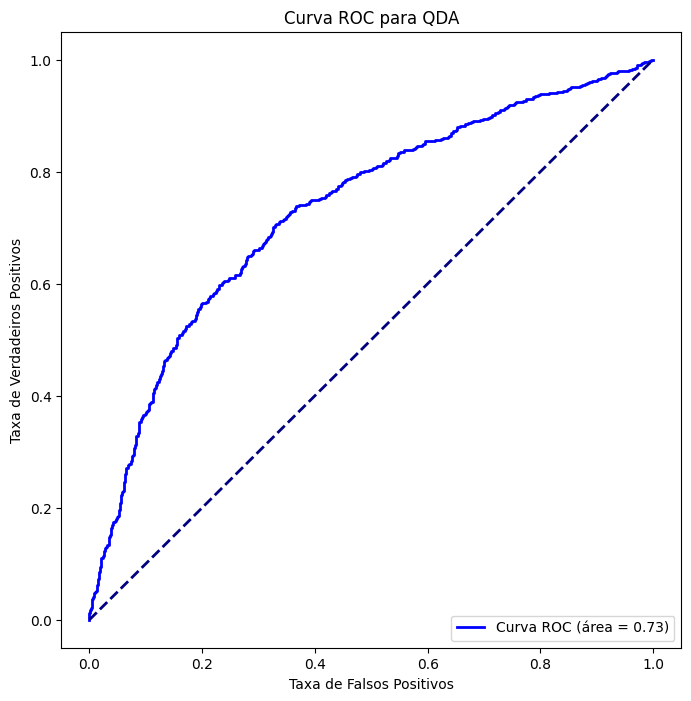

In [ ]:
# Criando uma instância do modelo QDA
qda = QuadraticDiscriminantAnalysis()

# Treinando o modelo com os conjuntos de treinamento
qda.fit(X_train, Y_train)

# Fazendo previsões nos conjuntos de teste
Y_pred_qda = qda.predict(X_test)

# Exibindo relatório de classificação
relatorio_classificacao_qda = classification_report(Y_test, Y_pred_qda)
print('Relatório de Classificação QDA:')
print(relatorio_classificacao_qda)

# Matriz de Confusão e performance
cnf_matrix_qda = metrics.confusion_matrix(Y_test, Y_pred_qda)

print(cnf_matrix_qda)
#matriz:
# 426 521
# 146 730

#usando a minha função de performance
perfm_qda = performance(cnf_matrix_qda)

# Calculando a curva ROC
y_score_qda = qda.decision_function(X_test)
fpr_qda, tpr_qda, thresholds_qda = roc_curve(Y_test, y_score_qda)
roc_auc_qda = auc(fpr_qda, tpr_qda)

# Plotando a curva ROC
plt.figure(figsize=(8, 8))
plt.plot(fpr_qda, tpr_qda, color='blue', lw=2, label='Curva ROC (área = {:.2f})'.format(roc_auc_qda))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC para QDA')
plt.legend(loc='lower right')
plt.show()

# MODELO NÃO LINEAR: KNN


Acurácia do modelo KNN: 0.5715852989577619
Relatório de Classificação KNN:
              precision    recall  f1-score   support

           0       0.58      0.63      0.61       947
           1       0.56      0.51      0.53       876

    accuracy                           0.57      1823
   macro avg       0.57      0.57      0.57      1823
weighted avg       0.57      0.57      0.57      1823

Matriz de Confusão KNN:
[[599 348]
 [433 443]]

RESULTADOS DO MODELO :

precisão = 0.5804263565891473
sensibilidade = 0.6325237592397043
acurácia = 0.5715852989577619
especificidade = 0.5057077625570776
taxa de predito negativo = 0.5600505689001264
taxa de falso positivo = 0.41957364341085274



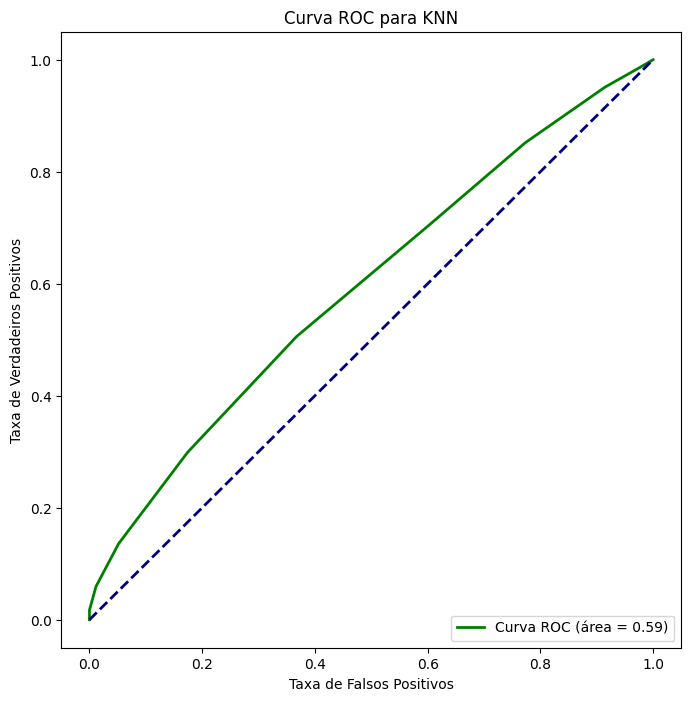

In [ ]:
# Criaando uma instância do modelo KNN (usamos k = 9 devido a melhor acurácia)
knn = KNeighborsClassifier(n_neighbors=9)

# Treinando o modelo com os conjuntos de treinamento
knn.fit(X_train, Y_train)

# Fazendo previsões nos conjuntos de teste
Y_pred_knn = knn.predict(X_test)

# Avaliando a precisão do modelo KNN
acuracia_knn = accuracy_score(Y_test, Y_pred_knn)
print(f'Acurácia do modelo KNN: {acuracia_knn}')

# Exibindo relatório de classificação
relatorio_classificacao_knn = classification_report(Y_test, Y_pred_knn)
print('Relatório de Classificação KNN:')
print(relatorio_classificacao_knn)

# Calculando a matriz de confusão
cnf_matrix_knn = metrics.confusion_matrix(Y_test, Y_pred_knn)
print('Matriz de Confusão KNN:')
print(cnf_matrix_knn)

#martriz:
# 706 241
# 530 346

#usando a minha função de performance
performance(cnf_matrix_knn)

# Calculando a curva ROC
y_score_knn = knn.predict_proba(X_test)[:, 1]  # Probabilidade da classe positiva
fpr_knn, tpr_knn, thresholds_knn = roc_curve(Y_test, y_score_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)

# Plotando a curva ROC
plt.figure(figsize=(8, 8))
plt.plot(fpr_knn, tpr_knn, color='green', lw=2, label='Curva ROC (área = {:.2f})'.format(roc_auc_knn))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC para KNN')
plt.legend(loc='lower right')
plt.show()



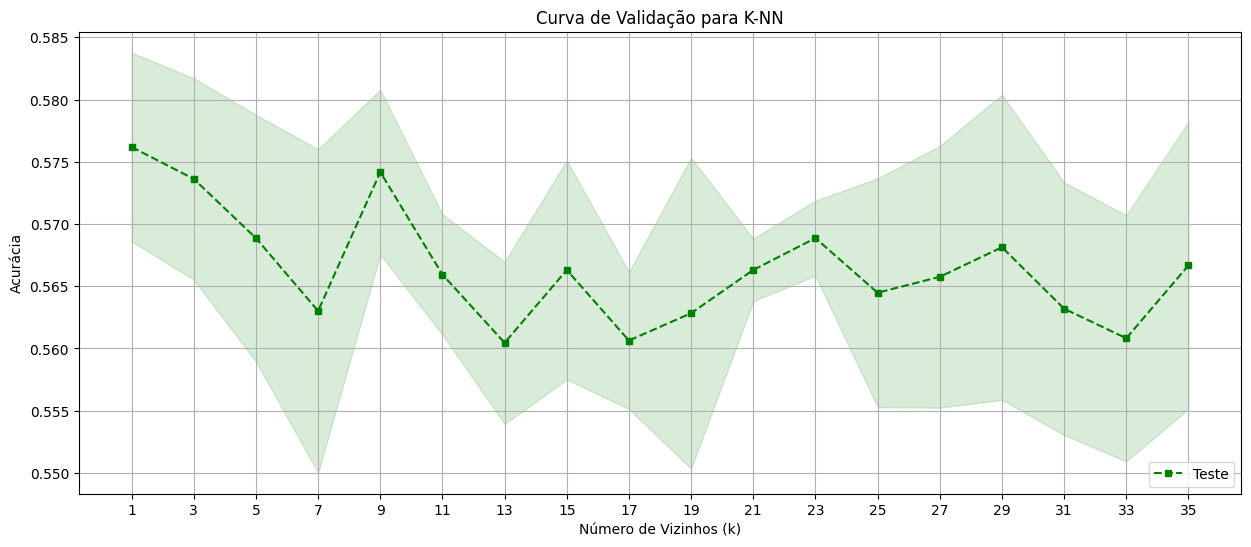

In [ ]:
#com base neste gráfico, dá pra ver que a escolha dos vizinhos n contribui para a melhoria do modelo, mas que 9 é o de menor custo e com maior acurácia (custo x benefício)
#param_range = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70]  #tentativas de análise
param_range = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35]
# Calculando a curva de validação

train_scores, test_scores = validation_curve(
    KNeighborsClassifier(),  # Use a classe do modelo
    X_train, Y_train,
    param_name='n_neighbors',
    param_range=param_range,
    scoring='accuracy',  # Pode mudar para outra métrica se desejado
    cv=5  # Número de dobras na validação cruzada
)

# Calculando as médias e desvios padrão dos escores de treinamento e teste
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plotando a curva de validação
plt.figure(figsize=(15, 6))
#plt.plot(param_range, train_mean, color='blue', marker='o', markersize=5, label='Treinamento')
#plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, alpha=0.15, color='blue')

plt.plot(param_range, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Teste')
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, alpha=0.15, color='green')
plt.title('Curva de Validação para K-NN')
plt.xlabel('Número de Vizinhos (k)')
plt.ylabel('Acurácia')
plt.legend(loc='lower right')
plt.xticks(param_range)
plt.grid()
plt.show()

A linha azul mostra a acurácia média do modelo no conjunto de treinamento à medida que o número de vizinhos (k) muda.

A área sombreada ao redor da linha azul indica a variabilidade (desvio padrão) da acurácia durante a validação cruzada no conjunto de treinamento.

A linha verde mostra a acurácia média do modelo no conjunto de teste à medida que o número de vizinhos (k) muda.

A área sombreada ao redor da linha verde indica a variabilidade (desvio padrão) da acurácia durante a validação cruzada no conjunto de teste.

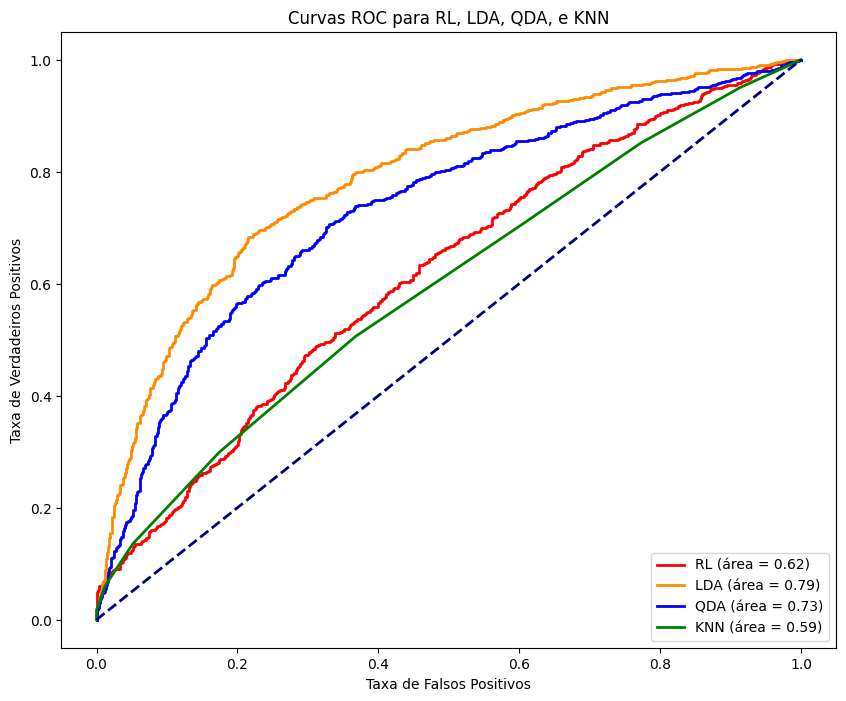

In [ ]:
# Plot de todas as ROCs
plt.figure(figsize=(10, 8))

plt.plot(fpr_reglog, tpr_reglog, color='red', lw=2, label='RL (área = {:.2f})'.format(roc_auc_reglog)) #caso queriam remover a RL, só comenta essa linha
plt.plot(fpr_lda, tpr_lda, color='darkorange', lw=2, label='LDA (área = {:.2f})'.format(roc_auc_lda))
plt.plot(fpr_qda, tpr_qda, color='blue', lw=2, label='QDA (área = {:.2f})'.format(roc_auc_qda))
plt.plot(fpr_knn, tpr_knn, color='green', lw=2, label='KNN (área = {:.2f})'.format(roc_auc_knn))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curvas ROC para RL, LDA, QDA, e KNN')
#plt.title('Curvas ROC para LDA, QDA, e KNN') #se quiserem remover a RL, descomentem essa e comentem a linha acima
plt.legend(loc='lower right')
plt.show()

Respondendo a terceira pergunta do HW, podemos ver que os modelos não lineares foram menos eficientes que os lineares para performar a classificação neste conjunto de dados.

# Criando exemplos visuais para melhorar explicação

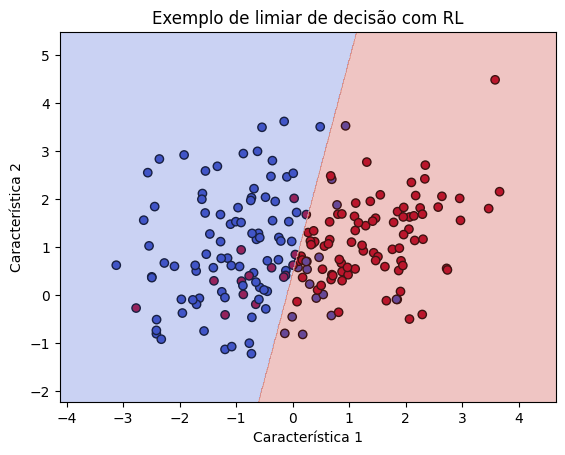

In [ ]:
#criando dados quaisquer
X, y = make_classification(n_samples=200, n_features=2, n_classes=2, n_clusters_per_class=1, n_redundant=0, random_state=42)

# Treinando o modelo
clf = LogisticRegression()
clf.fit(X, y)

# Criarndo uma grade de pontos para a superfície de decisão
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# Fazendo previsões na grade
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plotando o gráfico de dispersão
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)

plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.title('Exemplo de limiar de decisão com RL')
plt.show()

#acho q ficou legal, os azuis parecem uma bolinha e os vermelhos são mais estreitinnhos



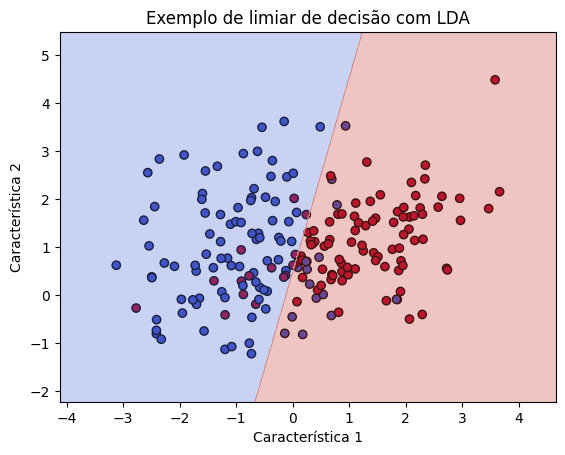

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Criando dados quaisquer
X, y = make_classification(n_samples=200, n_features=2, n_classes=2, n_clusters_per_class=1, n_redundant=0, random_state=42)

# Treinando o modelo LDA
lda = LinearDiscriminantAnalysis()
lda.fit(X, y)

# Criando uma grade de pontos para a superfície de decisão
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# Fazendo previsões na grade
Z = lda.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plotando o gráfico de dispersão
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)

plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.title('Exemplo de limiar de decisão com LDA')
plt.show()


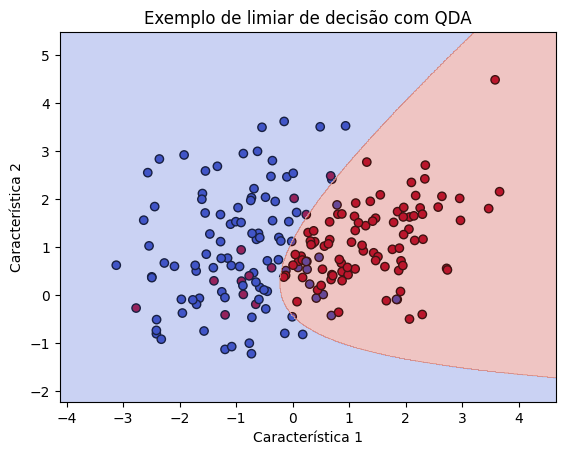

In [ ]:
#mesmos dados do anterior
# Treinando o modelo QDA
clf = QuadraticDiscriminantAnalysis()
clf.fit(X, y)

# Criando uma grade de pontos para a superfície de decisão
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# Fazendo previsões na grade
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plotando o gráfico de dispersão
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)

plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.title('Exemplo de limiar de decisão com QDA')
plt.show()

#me parece mais adequado que o outro, mas n quero comentar sovre métricas dele n

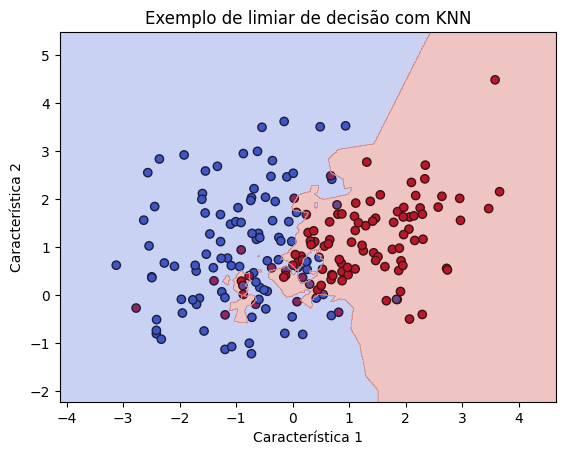

In [ ]:
#mesmos dados do anterior do anterior
# Treinando o modelo KNN
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X, y)

# Criando uma grade de pontos para a superfície de decisão
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# Fazendo previsões na grade
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plotando o gráfico de dispersão
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)

plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.title('Exemplo de limiar de decisão com KNN')
plt.show()

#ficou feio, acho q n vou usar
#dá pra aproveitar pro seminário

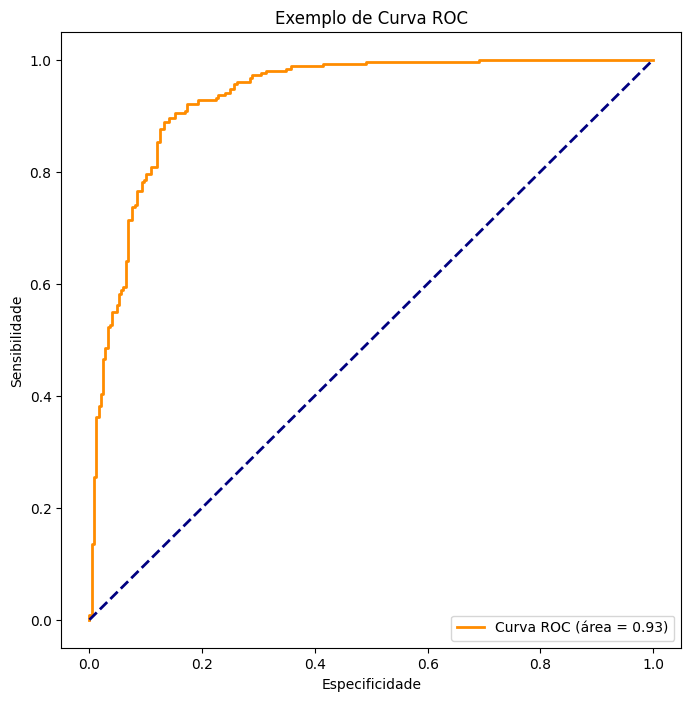

In [ ]:
#bora usar outros dados, só 200 ficou feio
X, y = make_classification(n_samples=500, n_features=2, n_classes=2, n_clusters_per_class=1, n_redundant=0, random_state=42)

# Treinando modelo de regressão logística
clf = LogisticRegression()
clf.fit(X, y)

# Fazendo previsões de probabilidade
y_probs = clf.predict_proba(X)[:, 1]

# Calculando a curva ROC
fpr, tpr, thresholds = roc_curve(y, y_probs)
roc_auc = auc(fpr, tpr)

# Plotando a curva ROC
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (área = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('Especificidade')
plt.ylabel('Sensibilidade')
plt.title('Exemplo de Curva ROC')
plt.legend(loc='lower right')
plt.show()

#tá melhor doq a do paint kkkkkkkkkk
